In [41]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% end of housekeeping

# Titration of Na2CO3

0.01 M Na2CO3 titrated with HCl.  you can write the charge balance

$[\mathrm{Na}^+]+[\mathrm{H}^+]=[\mathrm{OH}^-]+[\mathrm{Cl}^-]+[\mathrm{HCO_3}^-]+2[\mathrm{CO_3}^{2-}]$

If we specify the pH we know all the terms except for chloride concentration, so we can solve for chloride concentration versus pH (our titration curve).

For the two charged carbonate species their concentrations are (from alpha times total carbonate ($C_T=0.01$))

$[\mathrm{HCO_3^-}]=\dfrac{C_TK_{a1}[\mathrm{H^+}]}{[\mathrm{H}^+]^2+K_{a1}[\mathrm{H^+}]+K_{a1}K_{a2}}$

$[\mathrm{CO_3^{2-}}]=\dfrac{C_TK_{a1}K_{a2}}{[\mathrm{H}^+]^2+K_{a1}[\mathrm{H^+}]+K_{a1}K_{a2}}$




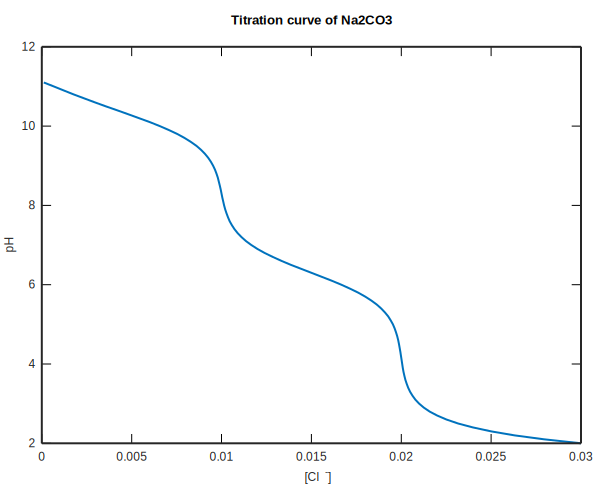

In [42]:
%plot -s 600,500 -f 'svg'
pKa1=6.3; pKa2=10.3; Kw=10^-14; 
Ka1=10^-pKa1; Ka2=10^-pKa2;
pH=2:0.1:12; H=10.^-pH; OH=Kw./H;
CT=0.01; 

denominator=H.^2+Ka1*H+Ka1*Ka2;
alphaHA=(Ka1*H)./denominator; HCO3=CT*alphaHA;
alphaA=(Ka1*Ka2)./denominator; CO3=CT*alphaA;

Na=2*CT; % two sodium per mole of Na2CO3
Cl=H+Na-HCO3-OH-2*CO3;

% only plot the positive values
c=0;
for i=1:size(Cl,2)
if Cl(i)>=0; c=c+1; Clpos(c)=Cl(i); pHpos(c)=pH(i); end
end

plot(Clpos,pHpos,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12)
xlabel('[Cl^-]','fontsize',12);
ylabel('pH','fontsize',12)
title('Titration curve of Na2CO3')

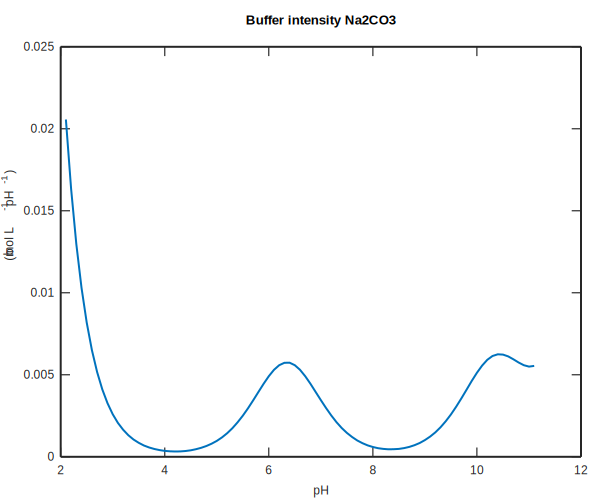

In [43]:
dCl=diff(Clpos); 
dpH=diff(pHpos); 
B=-dCl./dpH; % since pH is decreasing we multiply by -1
pHplot=pHpos(1:size(pHpos,2)-1)+dpH(1);
plot(pHplot,B,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
xlabel('pH','fontsize',12); 
ylabel('\beta (mol L^{-1} pH^{-1})','fontsize',12)
title('Buffer intensity Na2CO3')